# 080 Curve Fitting with Scikit Learn

> COM6018

*Copyright &copy; 2023 Jon Barker, University of Sheffield. All rights reserved*.


## Introduction

In this lab we will be using linear regression to fit a model to the atmospheric gas concentration data that we have been working with in this module.

The lab assumes that you have read and understood the lecture notes, Curve Fitting with Scikit learn. We will be using ideas from these notes in the lab.


## Step 1 - Load the data

We will start by loading the data from the file `co2.csv` into a Pandas DataFrame. The data is in the same format as the data we used in the previous lab. 

You can use the 'read_csv' method. The file contains comment lines that start with '%' so you will need to use the read_csv 'comment' parameter to ignore these lines.

Read the data such that the DataFrame columns are called 'year', 'month', 'day' and 'co2'. The csv file also cantains columns called 'NB' and 'scale' but we will ignore these. You can use the 'drop' method to remove these columns from the DataFrame. Store the DataFrame in a variable called 'co2_df'.

Write the code below


In [9]:
# WRITE SOLUTION HERE

import pandas as pd

co2_df = pd.read_csv('data/co2.csv',header=None, names=['year','month','day','co2','NB','scale'],skipinitialspace=True,comment='%')
co2_df = co2_df.drop(['NB','scale'],axis=1)

## Step 2 - Prepare the data

We need to clean the data a little before we use it. For some of the rows the co2 value is missing and the file contains a 'NaN'. We want to drop all of these rows from the dataframe. We have done this in previous labs, so look back at your notes if you need to.

We also want to convert the year, month and day columns into a single column which we will call 'decimal_year' which is the year plus the fraction of the year. For example, 1st January 2019 would be 2019.0 and 1st July 2019 would be 2019.5. We will later use this column as the x-axis when we plot the data. Think carefully to work out the formula for combining the year, month and day to make this value. 

(Note, you can cheat a little and pretend that each month is 1/12 of a year. This is not exactly correct but it will be close enough for our purposes.)

Write the code for these two steps in the cell below and run the test cell to check your code.

In [12]:
# WRITE SOLUTION HERE

co2_df = co2_df.dropna()
co2_df['decimal_year'] = co2_df['year'] + (co2_df['month'] - 1) / 12 + (co2_df['day'] - 1) / 365

In [13]:
# TEST

assert co2_df.shape == (17685, 5), "The dataframe has the wrong shape"
assert set(co2_df.columns) == {'year', 'month', 'day', 'co2', 'decimal_year'}, "The dataframe has the wrong columns"
print('All tests passed!')

All tests passed!


## Step 3 - Plotting the data

We will now make a simple plot of the co2 concentration vs the decimal year. We can use the DataFrame's plot method to do this. Set the x and y parameters to the column names of the DataFrame that you want to plot. You can use the 'figsize' parameter to make the plot bigger A size of 10 by 6 should be suitable.

Write the line of code in the cell below and run to produce the plot.

<AxesSubplot: title={'center': 'CO2 Concentration over time'}, xlabel='Time', ylabel='CO2 Concentration (in ppm)'>

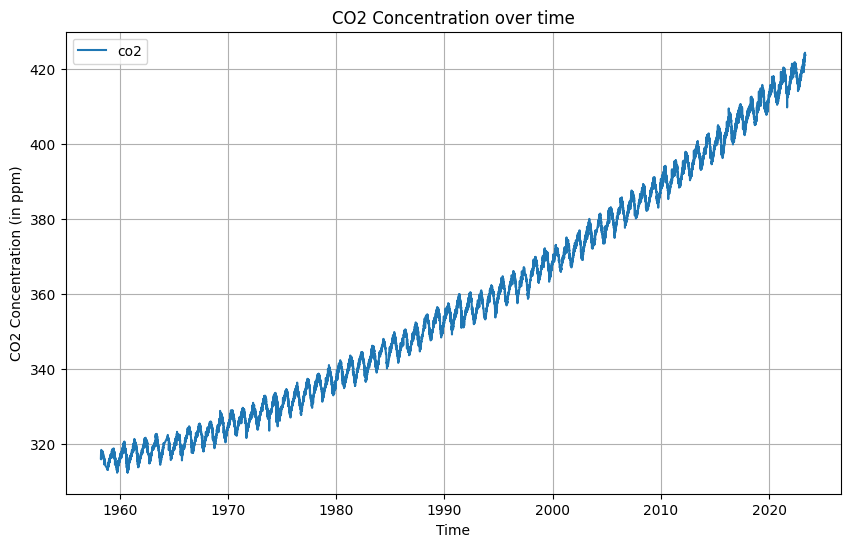

In [15]:
# WRITE SOLUTION HERE

co2_df.plot(x='decimal_year',y='co2',figsize=[10,6],xlabel='Time',ylabel='CO2 Concentration (in ppm)',title='CO2 Concentration over time',grid=True)

This should produce the famous 'Keeling curve'. You will see that the carbon dioxide concentration has been increasing steadily since the earliest date in the data and also that there is a season variation, i.e., the curve has a periodic fluctuation with a period of one year.

We are going to start by using a low order polynomial to fit the basic curve and we will then introduce periodic terms to model the seasonal fluctuations. Once we will use the model to try and predict the date that the co2 concentration will first reach 450ppm. 

## Step 4 - Fitting a polynomial curve using scikit-learn

### Step 4.1 - Fitting a straight line

We will start by fitting a straight line to the data using the 'LinearRegression' class from sklearn.linear_model. 

Import LinearRegression for sklearn.linear_model and make an instance of the class which you can call 'model'.  We will then use the model.fit method. The first parameter should be the decimal_year values (i.e., the x-axis values) and the second parameter should be the co2 values (i.e., the y-axis values). You can get these from the DataFrame. 

An important detail: the fit method requires that the x-axis values are passed as a 2-D array, i.e. you need to ensure that the shape of the decimal_year array is (n,1) rather than (n,). You can do this using the numpy reshape method or the expand_dims method. See the lecture notes for an example of how to do this.

After calling the fit method you can use the model to predict co2 values by calling the predict method and passing the decimal_year values. Store the result in a variable called 'co2_predicted'.

Then make a plot of the original co2 values and the co2_predicted values plotted against the date. Plot these on the same axes so that you can compare the straight line fit with the actual values.


<AxesSubplot: title={'center': 'Linear prediction of CO2 concentration over time'}, xlabel='Time', ylabel='CO2 Concentration (in ppm)'>

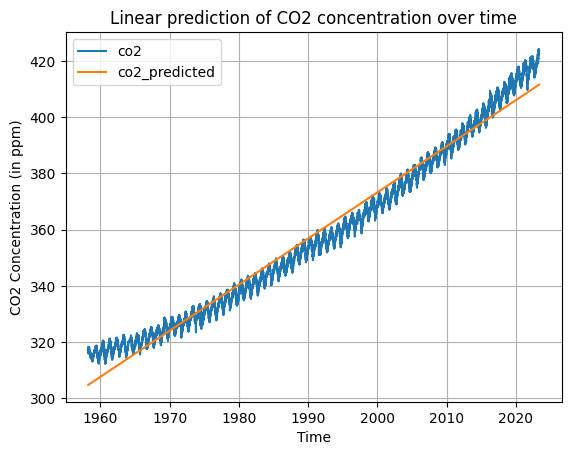

In [24]:
# WRITE SOLUTION HERE

from sklearn.linear_model import LinearRegression
import numpy as np


model = LinearRegression()

model_x = np.array(co2_df['decimal_year']).reshape(-1,1)
model.fit(model_x,co2_df['co2'])
co2_df['co2_predicted'] = model.predict(model_x)
co2_df.plot(x='decimal_year',y=['co2','co2_predicted'],xlabel='Time',ylabel='CO2 Concentration (in ppm)',title='Linear prediction of CO2 concentration over time',grid=True)

If you have donme everything correctly, you should see that the straight line is a reasonable fit to the data except that it doesn't capture the period component, but also the straight line is too steep in the 1960's and not steep enough in the 2000's and 2010's. The pace of the co2 increase has been increasing over time. 

We can make a better fit using a higher order polynomial with x^2 and x^3 terms. We will do this in the next step.

### Step 4.2 - Fitting a polynomial curve

We will now fit a polynomial curve to the data. We will use the PolynomialFeatures class from sklearn.preprocessing to generate the polynomial features. We will then use the LinearRegression class to fit the model.

Import PolynomialFeatures and LinearRegression from sklearn.preprocessing and sklearn.linear_model respectively. Make an instance of the PolynomialFeatures class and call it 'poly'. Set the degree parameter to 3. Pass the decimal_year values to the poly.fit_transform method and store the result in a variable called 'X'. (We will use a capital X to emphasise that this is a matrix).

The poly.fit_transform method returns a matrix with 4 columns. The first column is the constant term, the second column is the x^1 term, the third column is the x^2 term and the fourth column is the x^3 term. We will use this matrix as the input to the LinearRegression fit method.

Make an instance of the LinearRegression class and call it 'model'. Call the model.fit method and pass the X matrix and the co2 values, just as you did in the previous step.

Now we can called model.fit and pass the X matrix again to get the predicted co2 values. Store the result in a variable called 'co2_predicted'.

Make a plot of the original co2 values and the co2_predicted values plotted against the date. Plot these on the same axes so that you can compare the straight line fit with the actual values.




<AxesSubplot: title={'center': 'Linear prediction of CO2 concentration over time'}, xlabel='Time', ylabel='CO2 Concentration (in ppm)'>

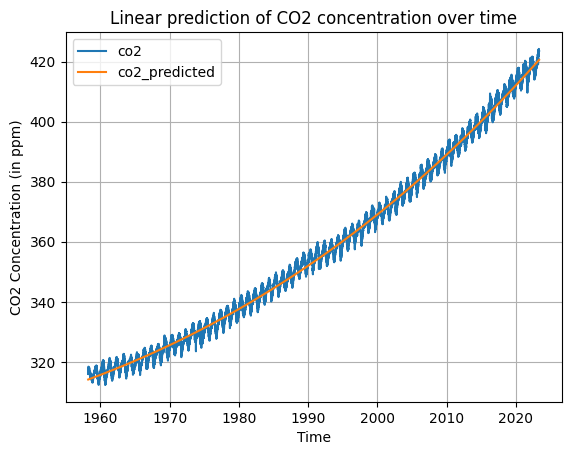

In [26]:
# WRITE SOLUTION HERE

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(model_x)

model = LinearRegression()
model.fit(X,co2_df['co2'])
co2_df['co2_predicted'] = model.predict(X)
co2_df.plot(x='decimal_year',y=['co2','co2_predicted'],xlabel='Time',ylabel='CO2 Concentration (in ppm)',title='Linear prediction of CO2 concentration over time',grid=True)

You will now see that the curve fits much better to the data.

We can quantify the goodness of the fit by computing the root mean squared error (RMSE) between the predicted co2 values and the actual ones.

We can do this easily by using the mean_squared_error function from sklearn.metrics. Import this function and then call it passing the co2 values and the co2_predicted values. By default this function returns the mean squared error (MSE). To get the RMSE value you need to also pass the parameter 'squared=False'. 

Store the result in a variable called 'rmse'. Print the value of rmse.

In [27]:
# WRITE SOLUTION HERE

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(co2_df['co2'],co2_df['co2_predicted'],squared=False)

print(rmse)

2.2566808215777905


### Step 4.3 - Finding the best polynomial degree

In the previous section we used a polynomial of degree 3. We did this by passing the parameter 'degree=3' to the PolynomialFeatures constructor. We can try different values of the degree parameter to see which gives the best fit.

In the cell below, use a loop to try values of degree from 1 to 10. For each value of degree, compute the RMSE and print it. You should be able to implement this quickly by cutting and pasting the code from the previous cells and then adding a loop around it.



In [29]:
# WRITE SOLUTION HERE

for i in range(0,10):
    poly = PolynomialFeatures(degree=i)
    X = poly.fit_transform(model_x)

    model = LinearRegression()
    model.fit(X,co2_df['co2'])
    co2_df['co2_predicted'] = model.predict(X)
    rmse = mean_squared_error(co2_df['co2'],co2_df['co2_predicted'],squared=False)

    print('For degree :',i," the RMSE is ",rmse)


For degree : 0  the RMSE is  31.756769836538616
For degree : 1  the RMSE is  4.732277685725684
For degree : 2  the RMSE is  2.2670809606823203
For degree : 3  the RMSE is  2.2566808215777905
For degree : 4  the RMSE is  2.2564964063327095
For degree : 5  the RMSE is  2.2563319050922415
For degree : 6  the RMSE is  2.2561863252862495
For degree : 7  the RMSE is  2.256058704729164
For degree : 8  the RMSE is  2.2559481100147933
For degree : 9  the RMSE is  2.2558536349804212


You should find that the error drops a lot going from degree 1 to degree 2, but then only drops a little bit more going from degree 2 to degree 3. After that, the error doesn't drop much at all. This suggests that degree 3 (i.e. a 3rd order polynomial) is the best choice.

### Step 4.4 - A fairer methodology for model evaluation

In the above, we tested our model by comparing the predictions against the actual values, but we made predictions at the same dates as were used when fitting the model. This is not a fair test because the model has already seen these data points and so it is not surprising that it fits them well. For our model to be useful we need it to work well when predicting values for dates that it has not seen before. So to test how well we can do this we want to fit the data using a subset of the dates (e.g. from the up to 2000) and then test the model by predicting the values for the dates that were not used for fitting (e.g. from 2000 to 2019).

The easiest way to do this is to split our co2 and date data into two parts which we might call co2_train and date_train for the years up to 2000 and co2_test and date_test for the years from 2000 to 2019. We can then fit the model using the co2_train and date_train data and then test the model by predicting the co2 values for the date_test values. We can then compare the predicted values with the actual values in co2_test.

We will first split the data. This can be done using the code below

In [30]:
co2 = co2_df['co2'].array
date = co2_df['decimal_year'].array

date_train = date[date < 2000].reshape(-1,1)
date_test = date[date >= 2000].reshape(-1,1)
co2_train = co2[date < 2000]
co2_test = co2[date >= 2000]

Now rewrite the code from the previous section that used a loop to compute RMSE value for polynomials of order N. But substitute date and co2 with the date_train, date_test and co2_train, co2_test values as appropriate. Note, you will also need to make X_train and X_test matrices using the date_train and date_test values.

In [35]:
# WRITE SOLUTION HERE

# WRITE SOLUTION HERE

for i in range(0,10):
    poly = PolynomialFeatures(degree=i)
    X_train = poly.fit_transform(date_train)
    X_test = poly.fit_transform(date_test)

    model = LinearRegression()
    model.fit(X_train,co2_train)
    co2_predict = model.predict(X_test)
    rmse = mean_squared_error(co2_test,co2_predict,squared=False)

    print('For degree :',i," the RMSE is ",rmse)


For degree : 0  the RMSE is  58.663270732875375
For degree : 1  the RMSE is  14.291896901192612
For degree : 2  the RMSE is  2.573883852538661
For degree : 3  the RMSE is  15.530728900308505
For degree : 4  the RMSE is  15.718308797917926
For degree : 5  the RMSE is  15.910346292551246
For degree : 6  the RMSE is  16.10664895989209
For degree : 7  the RMSE is  16.307234107184147
For degree : 8  the RMSE is  16.512118016031128
For degree : 9  the RMSE is  16.721315569901503


Using this more rigorous methodology, you should find that the best polynomial order is 2 rather than 3. With order 3 the predictions become quite poor. This is a case of overfitting. The model with order 3 is too complex and it fits local variability in the training data that does not reflect the underlying trend.


### Step 5 - Modeling the periodic component

We will now improve our model by adding periodic terms. In the lecture notes we saw examples of how to do this by summing sine and cosine terms. For this to work we have to assume we know the period of the periodic component. In this case we know that the period is one year.

Our model is going to combine the polynomial terms with the periodic terms. So it 

$y = a + p_1 x + p_2 x^2 + ... + p_n x^{N_\alpha} + s_1 *sin(1 \times 2 \pi x) + c_1 *cos(1 \times 2 \pi x) + ... + s_n * sin (N_\beta \times 2 \pi x) + c_n * cos (N_\beta \times 2 \pi x)$

where x is the data in years and y is the co2 concentration. In the above equation, $N_\alpha$ is the order of the polynomial and $N_\beta$ is the number of periodic terms.

To fit this model we will need to store the function x, x^2, ..., x^N, and $sin(1 \times 2 \pi x)$, $cos(1 \times 2 \pi x)$, ..., $sin(n \times 2 \pi x)$, $cos(n \times 2 \pi x)$ in the matrix X. We will then use the LinearRegression class to fit the model in much the same way as we did in the previous section.

Making the X with the polynomial terms is easy. We just use the PolynomialFeatures class as we did before. But there is no equivalent function for making the periodic terms -- we need to make those using the numpy sine and cosine functions and append them to the X matrix. See the lecture notes for an example.

### Step 5.1 - Making the X matrix

In the cell below write a function called make_features to make the X matrix for the model above. The function should take the x values (i.e. the decimal_year values) and the order of the polynomial and the number of periodic terms as parameters. Call the parameters x, order_polynomial and order_periodic respectively. It should return the X matrix. 

The function can use the PolynomialFeatures class to make the polynomial terms and then append the periodic terms to the matrix. Or it may be similar to just make both the polynomial and periodic terms using numpy functions.

When you have written the function, run the test cell to check that it works.

In [61]:
# WRITE SOLUTION HERE

def make_features(x, order_polynomial, order_periodic):
    poly = PolynomialFeatures(degree=order_polynomial)
    X = poly.fit_transform(x)
    for i in range(0,order_periodic):
        X = np.c_[X,np.sin(2*np.pi*i*x),np.cos(2*np.pi*i*x)]
    return X

In [48]:
# TEST 
x = np.linspace(0, 1, 10).reshape(-1, 1)
assert make_features(x, 2, 0).shape == (10, 3)
assert make_features(x, 0, 2).shape == (10, 5)
assert make_features(x, 2, 2).shape == (10, 7)
print('All tests passed!')

All tests passed!


Now use your function to make the feature matrix X_train for a model with polynomial order 2 and periodic order 1, i.e. by passing the model the date_train values that you used earlier.  

Then make a LinearRegression model and call its fit method passing X_train and co2_train.

Finally call model.predict with the X_train values to get the predicted co2 values. Store the result in a variable called co2_predicted and plot the co2_predicted and co2_train values against the date_train values. You should see that the model fits the data well.


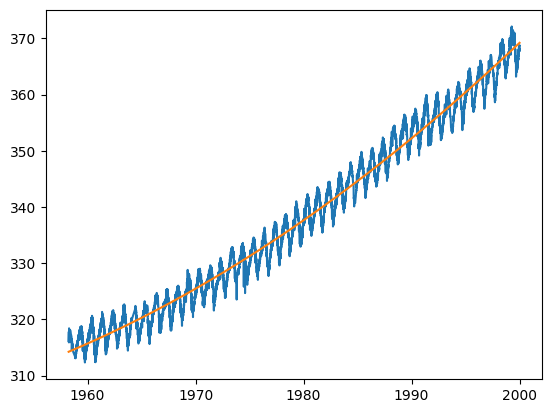

In [54]:
# WRITE SOLUTION HERE

X_train = make_features(date_train,2,1)

model = LinearRegression()

model.fit(X_train,co2_train)

co2_predicted = model.predict(X_train)

from matplotlib import pyplot as plt

plt.plot(date_train,co2_train)
plt.plot(date_train,co2_predicted)

You can play with the periodic_order to see how it affects the fit. In the next section we will try to find the best value for the periodic_order using the same methodology that we used to find the best value for the polynomial_order.

### Step 5.2 - Finding the best value for the periodic order

We will now use the same methodology that we used to find the best value for the polynomial order to find the best value for the periodic order. 

We will fix the polynomial order at the value of 2 but try periodic orders from 0 to 10. In each case we will fit the model using the date_train and co2_train values and then test the model by predicting the co2 values for the date_test values. We will compute the RMSE value for each value of the periodic order and print it to see which works best.

You should be able to do all of this using code from the previous sections. 

Implement your solution in the cell below.


In [57]:
# WRITE SOLUTION HERE

for i in range(0,10):
    X_train = make_features(date_train,2,i)
    X_test = make_features(date_test,2,i)
    model = LinearRegression()
    model.fit(X_train,co2_train)
    co2_predicted = model.predict(X_test)
    rmse = mean_squared_error(co2_predicted,co2_test,squared=False)
    print("For periodic order ",i," the RMSE is ",rmse)

For periodic order  0  the RMSE is  2.573883852538661
For periodic order  1  the RMSE is  2.573883852538661
For periodic order  2  the RMSE is  1.2148251955683684
For periodic order  3  the RMSE is  1.07319697814761
For periodic order  4  the RMSE is  1.0791427565088552
For periodic order  5  the RMSE is  1.075673089816951
For periodic order  6  the RMSE is  1.076063037571997
For periodic order  7  the RMSE is  1.076339679541069
For periodic order  8  the RMSE is  1.0765812773346242
For periodic order  9  the RMSE is  1.0755471693466403


You should find that the RMSE error with the periodic order set to 0 (i.e. the purely polynomial model) is about 2.57.  For the periodic order set to 1 (i.e. adding in just a simple sinusoidal variation)  and cosine term) it falls to about 1.21. Increasing to order 2 (i.e. adding in a second sinusoidal term) it falls a bit further to about 1.07. After that the prediction start to get worse again. i.e. the data is overfitting. 

So we will conclude that the best model to use is the one with polynomial order 2 and periodic order 2.

## Step 6 - Using our model to predict the future

We will now use our model to predict the date when the co2 concentration will first reach 450ppm. 

We will use the model of polynomial order 2 and periodic order 2 that we found was the best in the previous section.  We reestimate the model parameters using all the data (i.e. the date and co2 values from 1958 to 2019). We will then use the model to predict co2 levels up to the year 2100 and look to see when this value first reaches 450ppm.

### Step 6.1 - Re-estimating the model parameters

We will first re-estimate the model parameters using all the data. This is easy to do. We just need to make the X matrix using all the dates (i.e. passing 'date' to our make_features function). We then construct a new LinearRegression model and finally call the fit method on the model.

Implement this in the cell below and run the test function that will check that your model has the correct number of parameters, (i.e., 7)

In [58]:
# WRITE SOLUTION HERE

X_train = make_features(date_train,2,2)
X_test = make_features(date_test,2,2)
model = LinearRegression()
model.fit(X_train,co2_train)
co2_predicted = model.predict(X_test)

In [59]:
# TEST

assert model.coef_.shape == (7,), "The model has the wrong number of coefficients"
print('All tests passed!')

All tests passed!


### Step 6.2 - Predicting the future

Now make a new date axis with dates that run all the way from 2000 to 2040.

You can do this using np.linspace to generate the date values. Choose a resolution of about 0.01 years. i.e., 100 values per year. Call this date axis 'date_predict'.

The pass this date axis to your make_features function to make the corresponding X matrix. 

Then pass this X matrx to model.predict method to get the predicted co2 values. Store the result in a variable called co2_predicted.

Finally, plot the co2_predicted values against your date axis. 


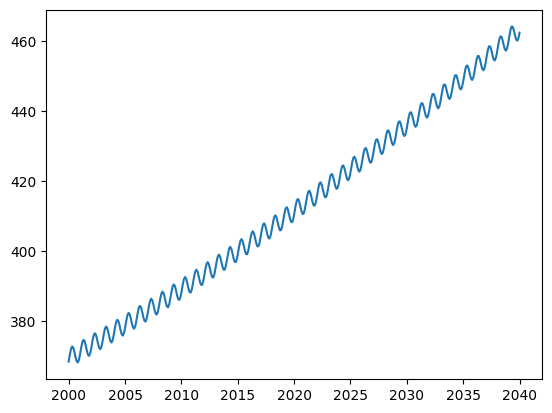

In [62]:
date_predict = np.linspace(2000, 2040, 400).reshape(-1, 1)
X_predict = make_features(date_predict, order_polynomial=2, order_periodic=2)
co2_predicted = model.predict(X_predict)
plt.plot(date_predict, co2_predicted)

You can now find the earliest data at which the co2 is predicted to exceed 450 ppm using something like

```
np.min(date_predict[co2_predicted > 450])
```

alternatively, you can ask for the last date at which the co2 is predicted to be less than 450 ppm using something like

```
np.max(date_predict[co2_predicted < 450])
```

These dates are a little different due to the annual fluctuations in the co2 concentration.

You can compare your estimate with that made by other data scientists. There are many predictions that can be found with a bit of searching on the web. For example, the following page has a prediction of 2037.

https://insight.factset.com/atmospheric-carbon-levels-may-2023-update#:~:text=The%20resulting%2014.3%20tells%20us,global%20warming%20are%20reached%3A%202037.

What we have to remember is that these are just predictions and that the future is uncertain. Our predictions have been made by modelling the past 60 years of data and extrapolating. This is making the big assumption that growth will continue on the same trajectory as it has in the past. Clearly though, this is not necessarily the case. For example, as the dangers of co2 emissions become more apparent, governments are taking action to reduce emissions. This would change the trajectory of the co2 concentration and so our model would no longer be valid. 